## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
# Can rename columns when making df
raw_df = pd.read_csv('QueryResults.csv', header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
display(raw_df.head())
display(raw_df.tail())
raw_df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
raw_df.shape

(2286, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [4]:
display(raw_df.count())
group_counted = raw_df.groupby('TAG').count()
group_counted

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [5]:
pd.options.display.float_format = '{:,.0f}'.format
group_tag = raw_df.groupby('TAG')
mean_count = group_tag.mean()
display(mean_count)
sum_count = group_tag.sum()
display(sum_count)
sum_count.sort_values('POSTS', ascending=False)

,POSTS
TAG,
assembly,242
c,"2,334"
c#,"9,817"
c++,"4,751"
delphi,321
go,368
java,"11,781"
javascript,"14,281"
perl,453


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
group_counted.sort_values('DATE')


,DATE,POSTS
TAG,,
go,150,150
swift,157,157
r,163,163
assembly,165,165
c,165,165
c++,165,165
delphi,165,165
java,165,165
javascript,165,165


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [6]:
type(raw_df.DATE[1])

str

In [7]:
# Changes the string date values in the column into Pandas Datetime objects/Series
raw_df.DATE = pd.to_datetime(raw_df['DATE'])

In [9]:
type(raw_df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
raw_df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1991 non-null   datetime64[ns]
 1   TAG     1991 non-null   object        
 2   POSTS   1991 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 46.8+ KB


## Data Manipulation



In [19]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
display(test_df)
test_df.pivot(index="Age", columns="Actor", values="Power").sort_values('Age', ascending=False)

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Young,80,100,25,50
Old,75,99,5,30


**Challenge**: Pivot our dataframe about Programming Languages. What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [21]:
reshaped_df = raw_df.pivot(index='DATE', columns='TAG', values='POSTS')
# Note that by pivoting the table, we created some NaN. Need to clean it up in next step
reshaped_df


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8,85,511,164,14,NaN,222,162,28,161,124,NaN,73,NaN
2008-09-01,28,321,"1,649",755,105,NaN,"1,137",640,131,482,542,6,290,NaN
2008-10-01,15,303,"1,989",811,112,NaN,"1,153",725,127,617,510,NaN,249,NaN
2008-11-01,17,259,"1,730",735,141,NaN,958,579,97,504,452,1,160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317,"2,670","8,954","5,107",181,719,"13,253","20,483",215,"6,672","26,673","5,761",780,"3,434"
2020-04-01,406,"3,472","10,042","6,820",250,887,"15,377","24,634",240,"8,060","32,605","7,047",860,"4,015"
2020-05-01,386,"3,602","9,923","7,063",221,826,"14,711","25,196",228,"7,917","34,478","6,833",774,"4,066"


In [22]:
reshaped_df.shape

(145, 14)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [23]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [24]:
# Fill in NaN with the .fillna() - change NaN to value of 0
# inplace=True helps to actually save the changes to our table (instead of df = df.filna())
reshaped_df.fillna(0, inplace=True) 
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [25]:
# We can look through to double_check there are no more NaN values:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

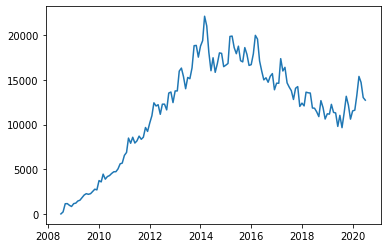

In [26]:
# you can include the index as the x-axis
plt.plot(reshaped_df.index, reshaped_df['java'])

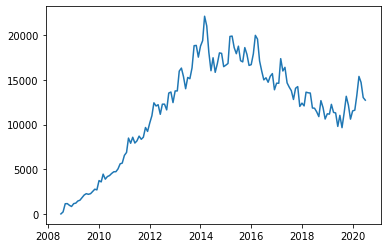

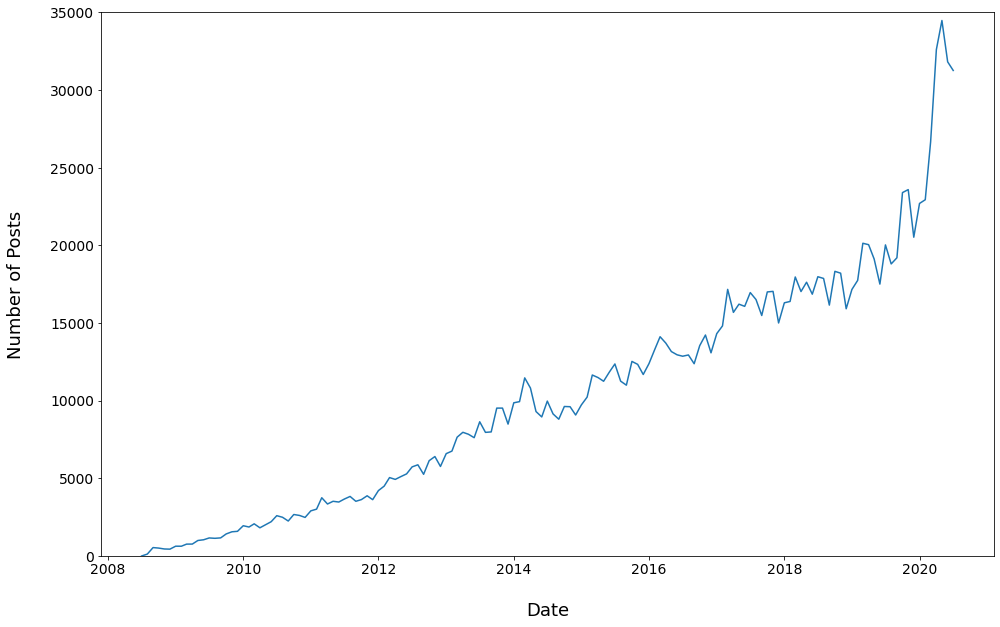

In [27]:
# Or just leave it blank and it defaults to using the index
plt.plot(reshaped_df['java'])
# We can do things to change the graph:
# figsize makes it bigger (x,y)
plt.figure(figsize=(16,10))
# with a bigger graph, axis increment ticks need to be adjusted
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Can add labels to axis (even recognizes \n :D)
plt.xlabel("\nDate", fontsize=18)
plt.ylabel("Number of Posts\n", fontsize=18)
# Limit the plot window based on values on axis:
plt.ylim(0,35000)
plt.plot(reshaped_df['python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

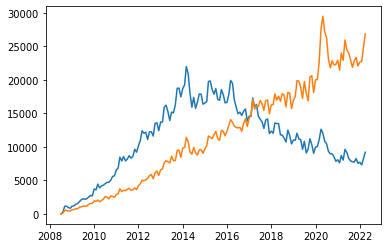

In [ ]:
plt.plot(reshaped_df['java'])
plt.plot(reshaped_df['python'])

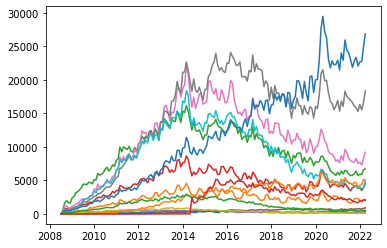

In [ ]:
# Here's how to plot all the columns in a graph

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

# Note that plot modifications are contained to specific plots

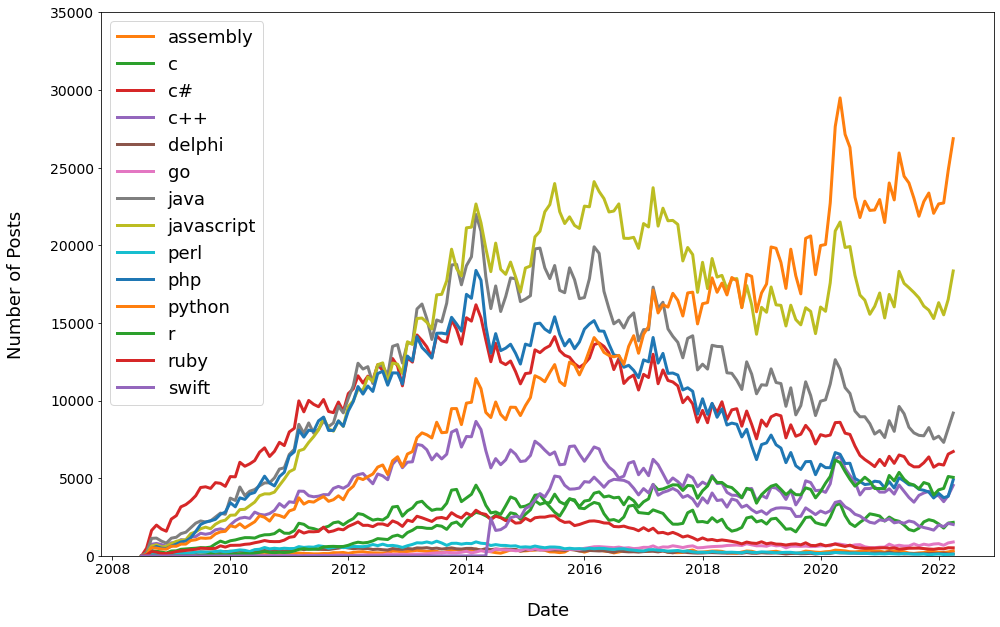

In [ ]:
plt.figure(figsize=(16,10))
# with a bigger graph, axis increment ticks need to be adjusted
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Can add labels to axis (even recognizes \n :D)
plt.xlabel("\nDate", fontsize=18)
plt.ylabel("Number of Posts\n", fontsize=18)
# Limit the plot window based on values on axis:
plt.ylim(0,35000)
plt.plot(reshaped_df['python'])

# Make graph easier to read with linewidth and legend changes
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=18)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
rolling_mean_java = reshaped_df['java'].rolling(window=6).mean()
rolling_mean_python = reshaped_df['python'].rolling(window=6).mean()

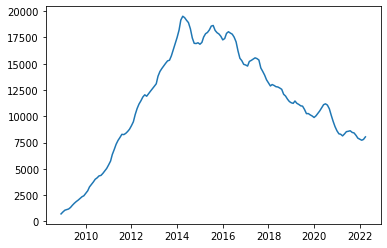

In [ ]:
plt.plot(rolling_mean_java)

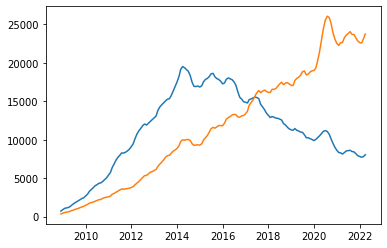

In [ ]:
plt.plot(rolling_mean_java)
plt.plot(rolling_mean_python)

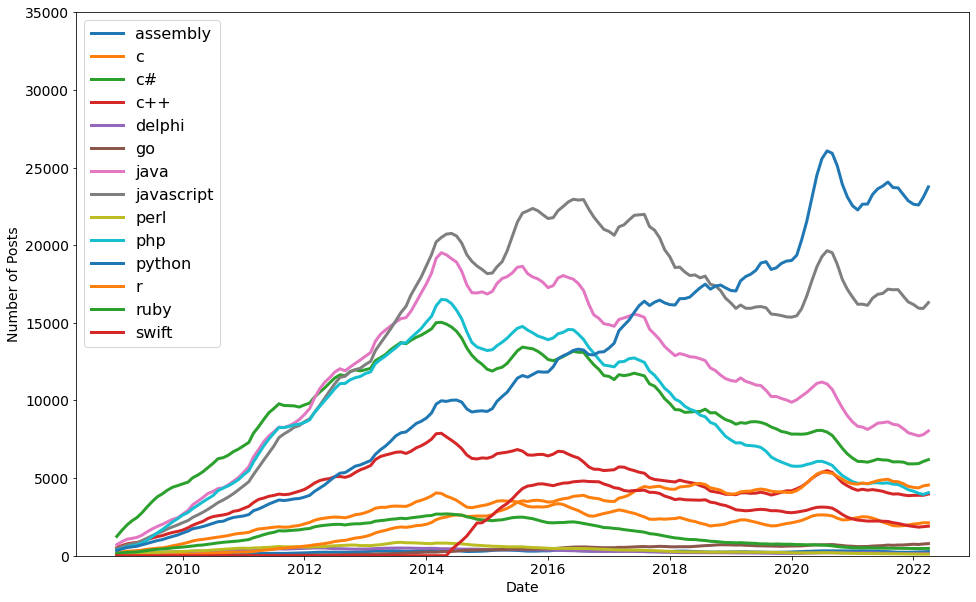

In [ ]:
# You can do it individually, or just make a whole new table and go from there:

roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)